# Template Matching

In [1]:
import sys ; sys.path.append("../") # osx
import cvlib

import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
PATH = '../im/'
img = cv.imread(PATH+'cameraman.tif', cv.IMREAD_GRAYSCALE)
img2 = img.copy()
template = cv.imread(PATH+'cameraman_face.jpg', cv.IMREAD_GRAYSCALE)

scale = 0.25
template = cv.resize(template, None,fx=scale, fy=scale, interpolation = cv.INTER_CUBIC)
w, h = template.shape[::-1]
print(img.shape)
print(template.shape)

(256, 256)
(85, 84)


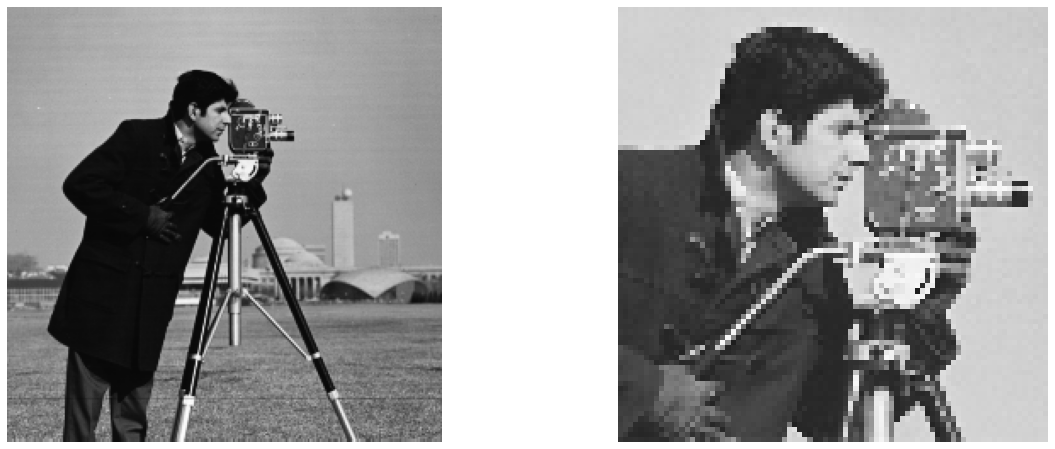

In [3]:
cvlib.plot.imgcmp(img, template)

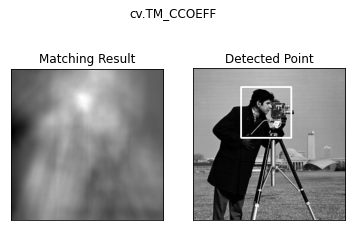

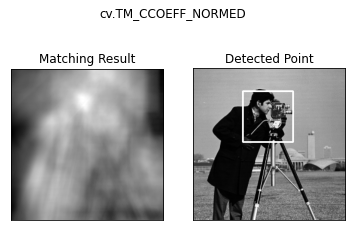

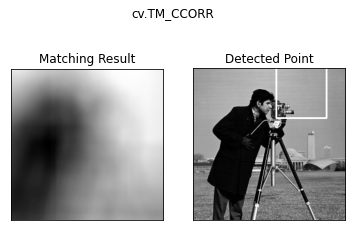

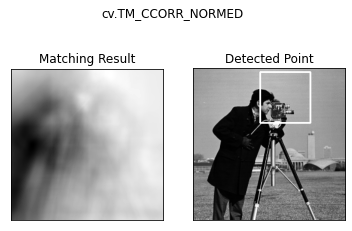

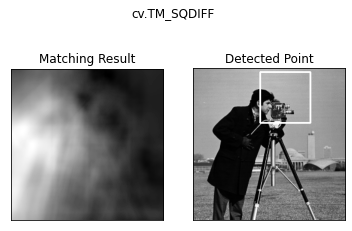

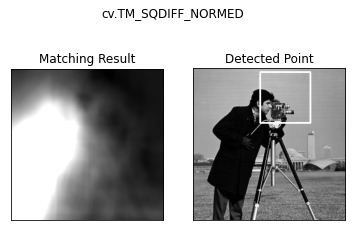

In [4]:
methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR',
            'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']

for meth in methods:
    img = img2.copy()
    method = eval(meth)

    # Apply template Matching
    res = cv.matchTemplate(img, template,method)
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)

    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)

    cv.rectangle(img,top_left, bottom_right, 255, 2)

    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img,cmap = 'gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)

    plt.show()

In [5]:
def pyramid(img, scale=0.5, min_size=(8,8)):
    """ Build a pyramid for an image until min_size
        dimensions are reached.
    Args: 
        img (numpy array): Source image
        scale (float): Scaling factor
        min_size (tuple): size of pyramid top level.
    Returns:
        Pyramid generator
    """
    yield img
    
    while True:
        img = cv.resize(img, None,fx=scale, fy=scale, interpolation = cv.INTER_CUBIC)
        if ((img.shape[0]<min_size[0]) and img.shape[1]<min_size[1]):
            break
        yield img

In [6]:
template = cv.imread(PATH+'cameraman_face.jpg', cv.IMREAD_GRAYSCALE)
for i in pyramid(template):
    print(i.shape)

(339, 338)
(170, 169)
(85, 84)
(42, 42)
(21, 21)
(10, 10)
